In [346]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [347]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv(r'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=cols)

# A. PCA

In [348]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [349]:
pca_projection = pca.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [350]:
c = pd.concat([pd.DataFrame(pca_projection), pd.DataFrame(data['class'])], axis=1)

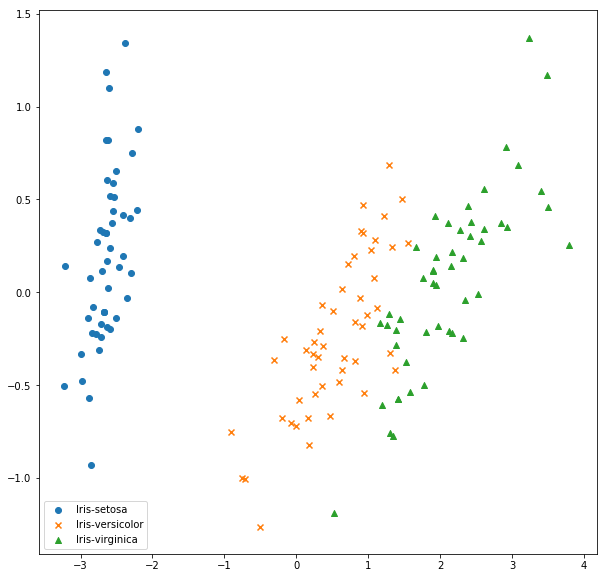

In [351]:
plt.figure(figsize=(10, 10))
plt.scatter(c[c['class']=='Iris-setosa'][0], c[c['class']=='Iris-setosa'][1], marker='o', label='Iris-setosa')
plt.scatter(c[c['class']=='Iris-versicolor'][0], c[c['class']=='Iris-versicolor'][1], marker='x', label='Iris-versicolor')
plt.scatter(c[c['class']=='Iris-virginica'][0], c[c['class']=='Iris-virginica'][1], marker='^', label='Iris-virginica')
plt.legend()
plt.show()

# The classes are well-separated from each other

# B. Classifier based on Generative model

In [352]:
import pandas as pd
import scipy.stats

In [353]:
train_class_data = pd.DataFrame(columns=cols)
test_class_data = pd.DataFrame(columns=cols)
cls = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
for c in cls:
    train_class_data = pd.concat([train_class_data, data[data['class']==c][0:35]])
    test_class_data = pd.concat([test_class_data, data[data['class']==c][35:50]])

test_class_label = test_class_data['class'].values.tolist()
test_class_data = test_class_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values.tolist()

In [354]:
#Mean and Cov for each class
class_mean = {}
class_cov = {}
class_prob = {}
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for c in cls:
    class_cov[c] = np.cov(train_class_data[train_class_data['class']==c][features].T)
    
    m = []
    for feature in features:
        m.append(np.mean(train_class_data[train_class_data['class']==c][feature]))
    class_mean[c] = m
    
    class_prob[c] = (sum(train_class_data['class']==c)+0.0)/len(train_class_data)
    

In [355]:
#Gaussian model
gaussian_model = {}
for c in cls:
    gaussian_model[c] = scipy.stats.multivariate_normal(class_mean[c], class_cov[c])
    
test_class_prob = [[np.log(class_prob[c]) + gaussian_model[c].logpdf(test_class_data[i]) for c in cls]
                      for i in range(len(test_class_data))]

class_outcome = []
for i in range(len(test_class_prob)):
    outcome = np.where(test_class_prob[i] == max(test_class_prob[i]))[0][0]
    if outcome==0:
        class_outcome.append(cls[0])
    elif outcome==1:
        class_outcome.append(cls[1])
    elif outcome==2:
        class_outcome.append(cls[2])

count = sum([class_outcome[i] == test_class_label[i] for i in range(len(class_outcome))])
print "Error rate = ",100-((count+0.0)/len(test_class_data))*100,"%"

Error rate =  0.0 %
